<a href="https://colab.research.google.com/github/annisakrnn/Machine-Learning_2025/blob/main/TG4_2341720070_ANNISA_KURNIAWATI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q pandas matplotlib numpy
!pip install scikit-learn

Import Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


# Praktikum 1

In [ ]:
#Persiapan data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('Iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Seleksi Fitur

In [ ]:
# Seleksi Fitur

X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Plot Data
Karena data 4 dimensi, maka akan kita coba
plot cluster berdasarkan Sepal Length dan Sepal Width  saja

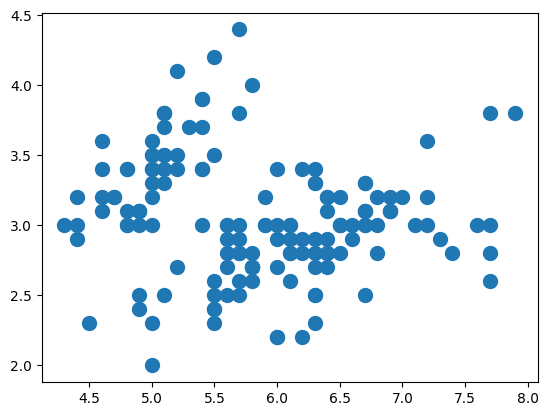

In [ ]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

Model KMeans
Dengan menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

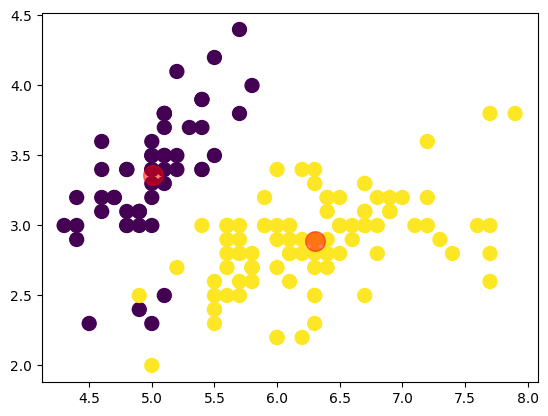

In [ ]:
from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

Cek Nilai SSE

In [ ]:
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


Implementasi Metode Elbow

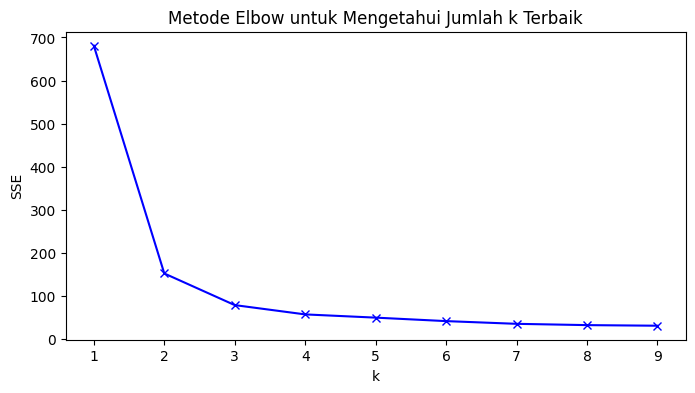

In [ ]:
# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

Cek Nilai SSE setiap k

In [ ]:
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8243999999996
k=2; SSE=152.36870647733915
k=3; SSE=78.94084142614601
k=4; SSE=57.35501904761905
k=5; SSE=49.86865426388461
k=6; SSE=41.79530692640694
k=7; SSE=35.50213901229489
k=8; SSE=32.50346461871463
k=9; SSE=31.098633498854078


# Praktikum 2

Import library

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

Pengantar k-Means

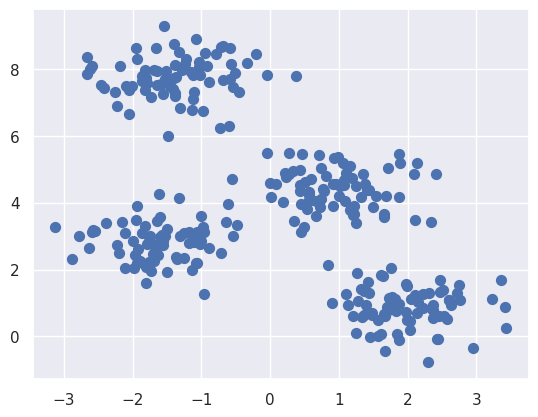

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

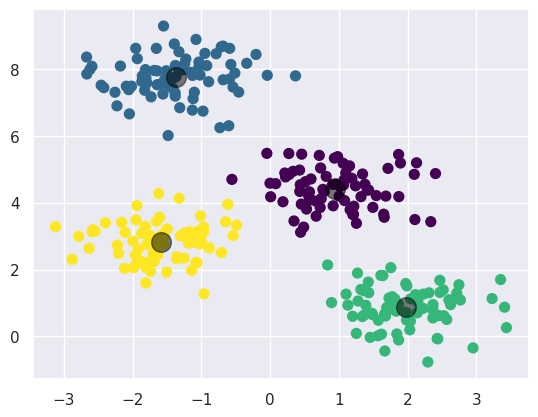

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

#implementasi scatter
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

Algoritma Expectation-Maximization

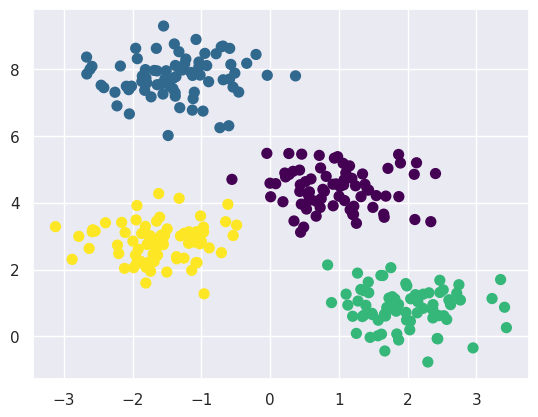

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)

        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

Perubahan random

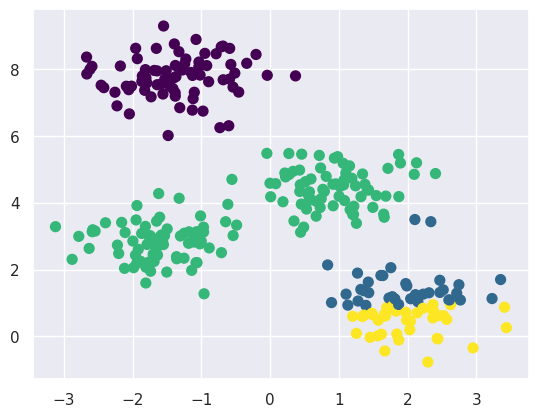

In [ ]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

Optimalisasi Jumlah Klaster

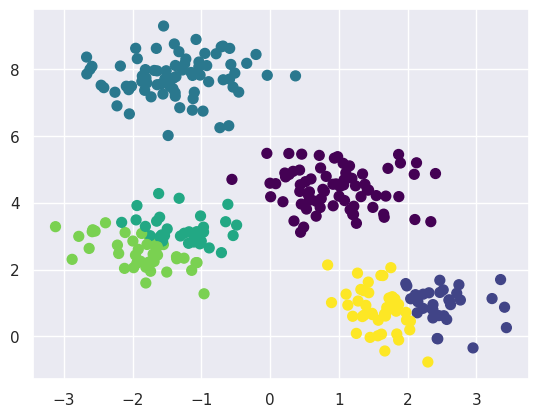

In [ ]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

Batas Klaster yang Tidak Selalu Linier

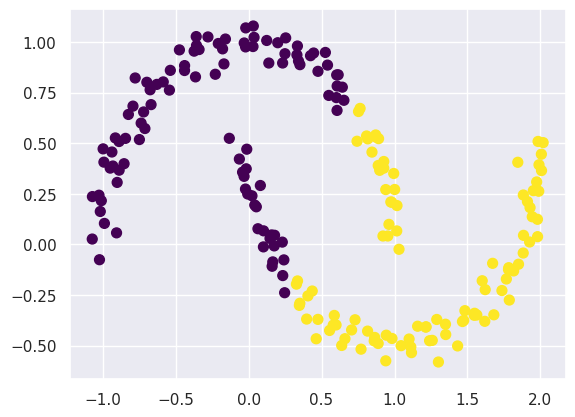

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

#implementasi scatter
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


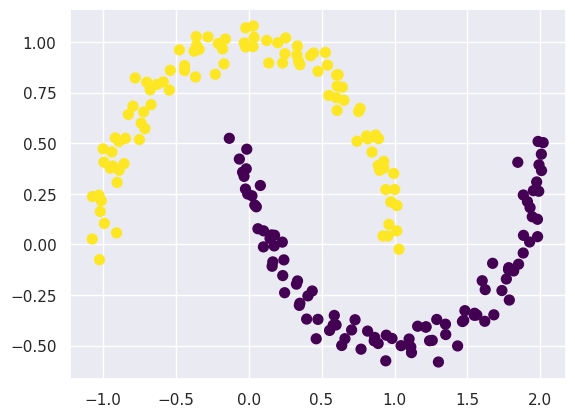

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

Contoh Kasus 1: Karakter Angka

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Menerapkan K-Means

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

Implementasi Tampilan

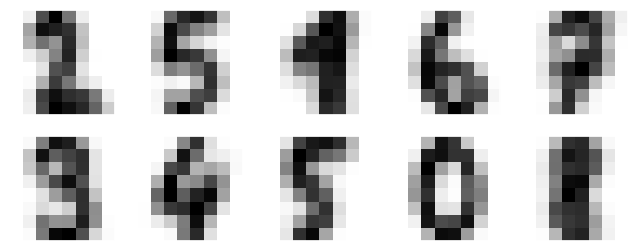

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [ ]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

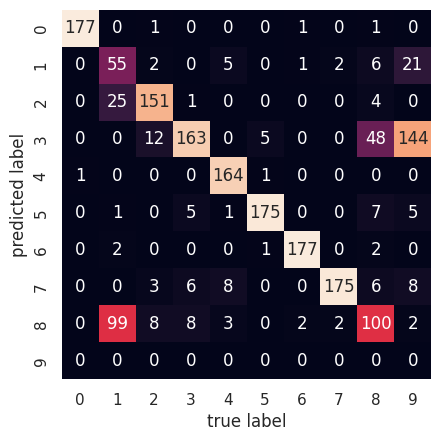

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target, labels)

0.9410127991096272

Studi Kasus 2: Kompresi Citra

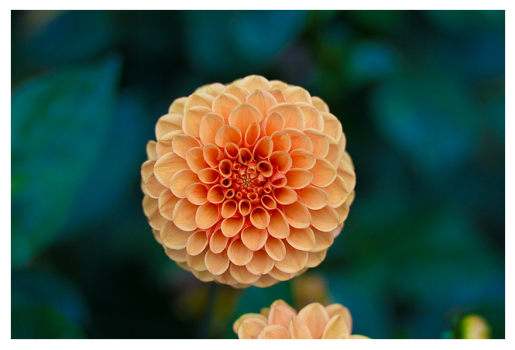

In [ ]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

In [ ]:
flower.shape

(427, 640, 3)

In [ ]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

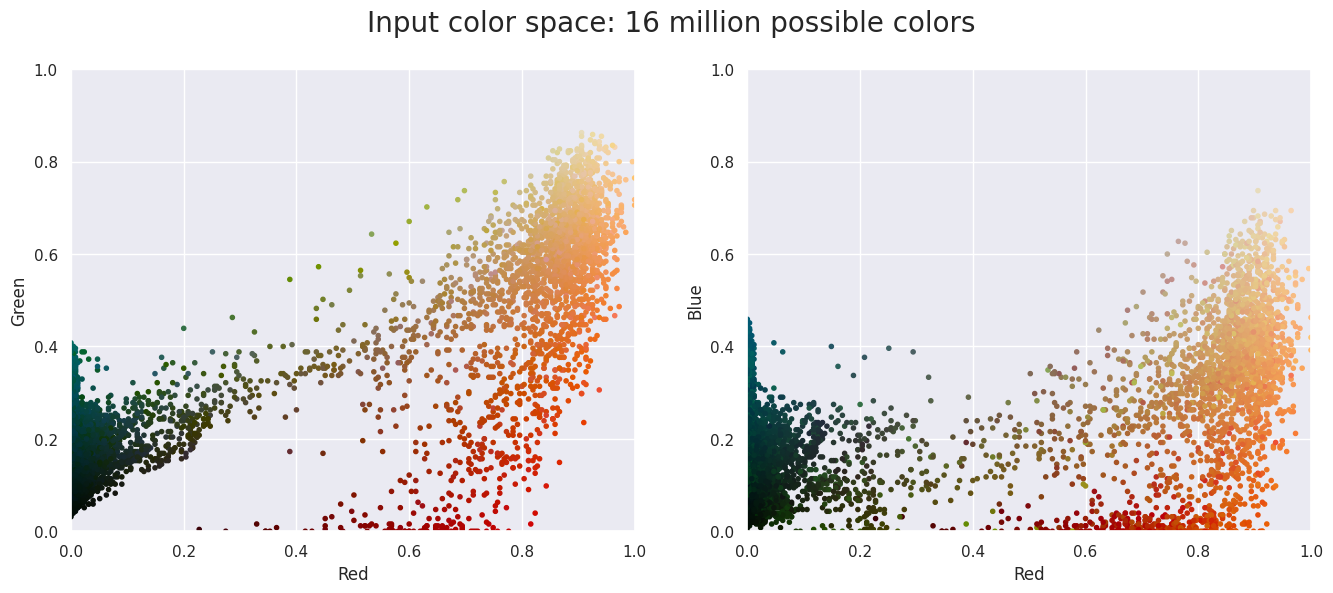

In [ ]:
import numpy as np
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);


  #implementasi dipanggil DI LUAR fungsi
plot_pixels(data, title='Input color space: 16 million possible colors')


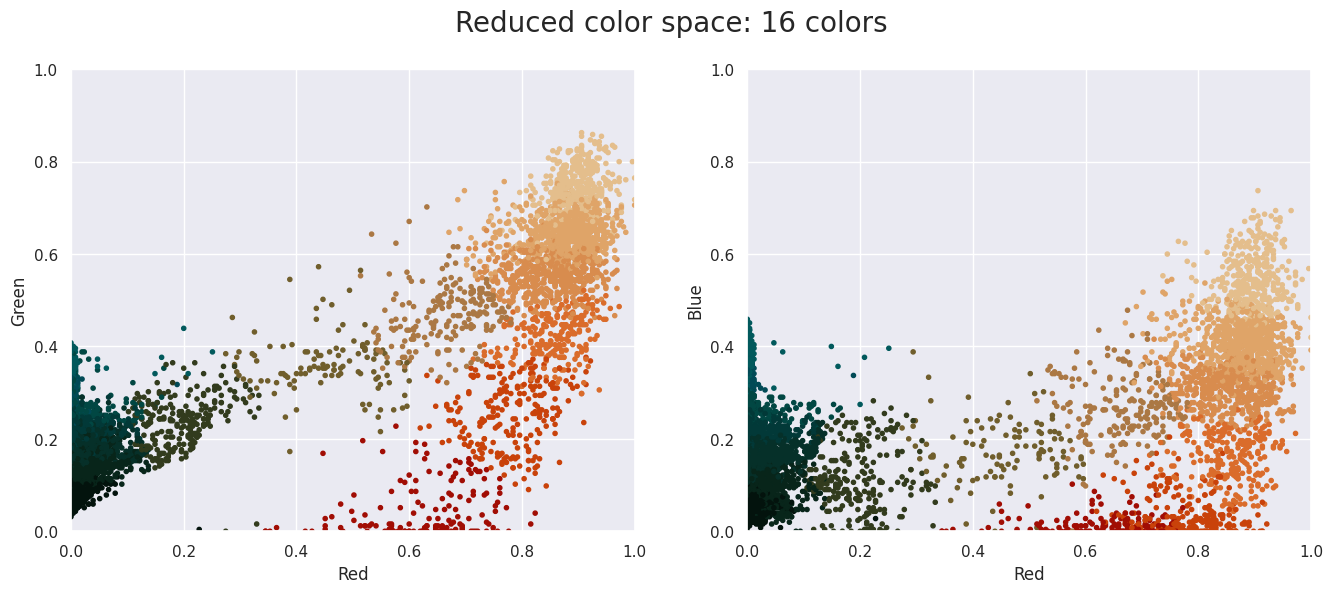

In [ ]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

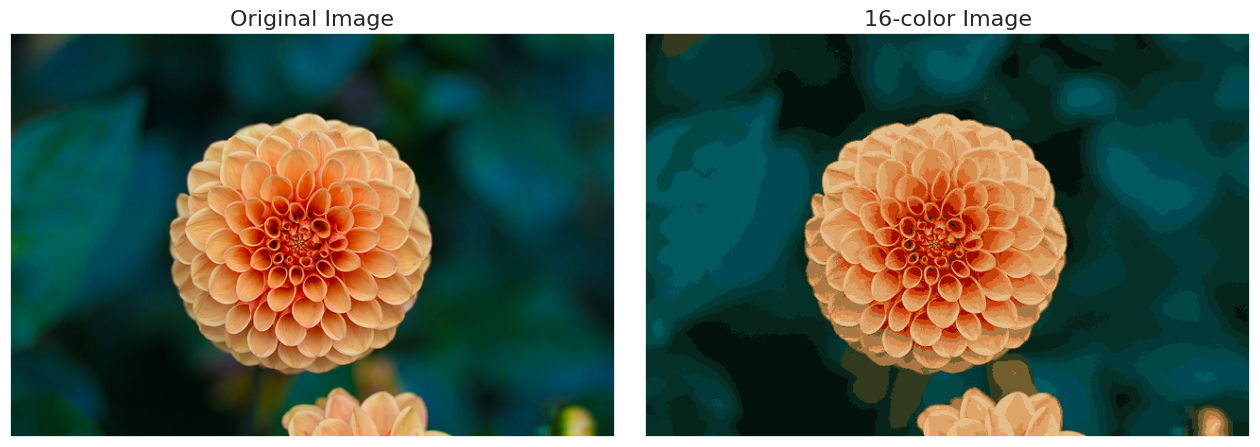

In [ ]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

# Praktikum 3

**Pembuatan Dataset Sintetis**

Untuk mempelajari DBSCAN, kita akan membuat dataset sederhana berupa 3 klaster buatan menggunakan fungsi  make_blobs  dari Scikit-Learn.

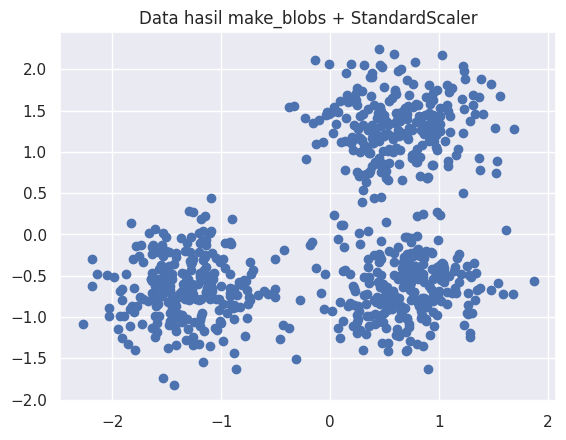

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# buat dataset dengan 3 cluster
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

# normalisasi
X = StandardScaler().fit_transform(X)

# plot hasil
plt.scatter(X[:, 0], X[:, 1])
plt.title("Data hasil make_blobs + StandardScaler")
plt.show()


**Compute DBSCAN**

Sekarang kita terapkan DBSCAN pada data tersebut.

Label yang ditetapkan oleh DBSCAN dapat diakses melalui atribut labels_. Titik data yang dianggap noise akan diberi label khusus.


- eps=0.3 → jarak maksimum antar titik untuk dianggap tetangga.

- min_samples=10 → jumlah minimum titik dalam radius eps agar dianggap area padat (core sample).

- Label hasil klasterisasi tersedia di labels. Nilai -1 berarti titik tersebut dianggap noise atau outlier.

In [ ]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN

# misal X sudah tersedia dari make_blobs / dataset sebelumnya
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# jumlah cluster (mengabaikan noise)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)


Estimated number of clusters: 3
Estimated number of noise points: 18


**Evaluasi Kualitas Klasterisasi**

Karena kita menggunakan dataset sintetis (make_blobs), kita tahu label aslinya (labels_true). Ini memungkinkan kita mengukur kualitas DBSCAN dengan berbagai metrik evaluasi.

*   **Homogeneity** → apakah tiap klaster hanya berisi satu label asli.
*   **Completeness** → apakah semua sampel dengan label asli yang sama masuk ke klaster yang sama.
*   **V-measure** → rata-rata harmonik dari homogeneity dan completeness.
*   **Adjusted Rand Index (ARI)** → kesesuaian antara klasterisasi dengan label asli.
*   **Adjusted Mutual Information (AMI)** → kesamaan informasi antara klasterisasi dengan label asli.
*   **Silhouette Coefficient** → seberapa baik data dikelompokkan (nilai mendekati 1 berarti bagus, mendekati 0 berarti berada di batas, negatif berarti salah klaster).


In [ ]:
from sklearn import metrics

print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(f"Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")


Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


**Visualisasi Hasil Klasterisasi**
Kita akan memvisualisasikan hasil DBSCAN.
*   Core sample ditampilkan dengan titik besar.
*   Non-core sample ditampilkan dengan titik kecil.
*   Noise ditampilkan dengan warna hitam.

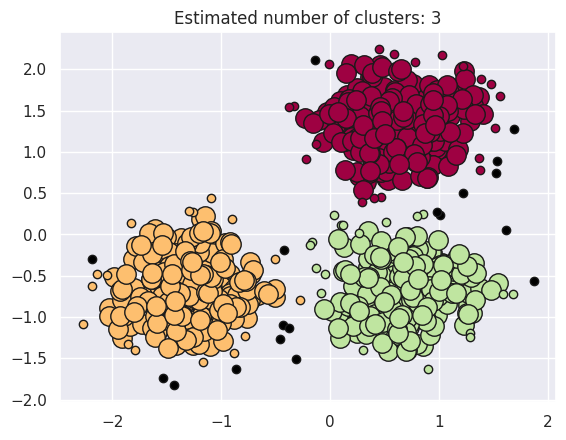

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # core points
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    # non-core points
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()


# Tugas Praktikum

**Tugas K-Means**

1. Gunakan data 'Mall_Customers.csv'

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

Annual Income (k$)
Karena pendapatan tahunan pelanggan mencerminkan daya beli mereka, yang dapat menjadi indikator penting untuk segmentasi pelanggan. Variasi dalam pendapatan untuk mengelompokkan pelanggan ke dalam kelompok seperti "high-income" atau "low-income", yang relevan untuk strategi pemasaran.


Spending Score (1-100):
Karena skor pengeluaran menunjukkan seberapa sering atau seberapa banyak pelanggan berbelanja di mall. Untuk mengidentifikasi pola perilaku belanja, seperti pelanggan yang boros atau hemat.

3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.

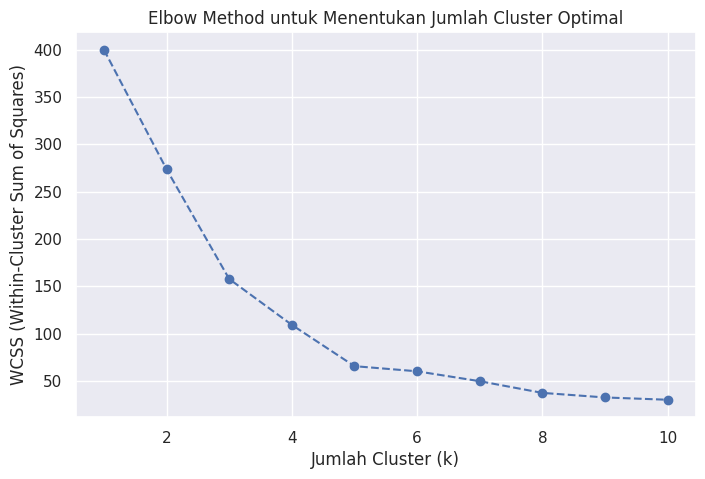

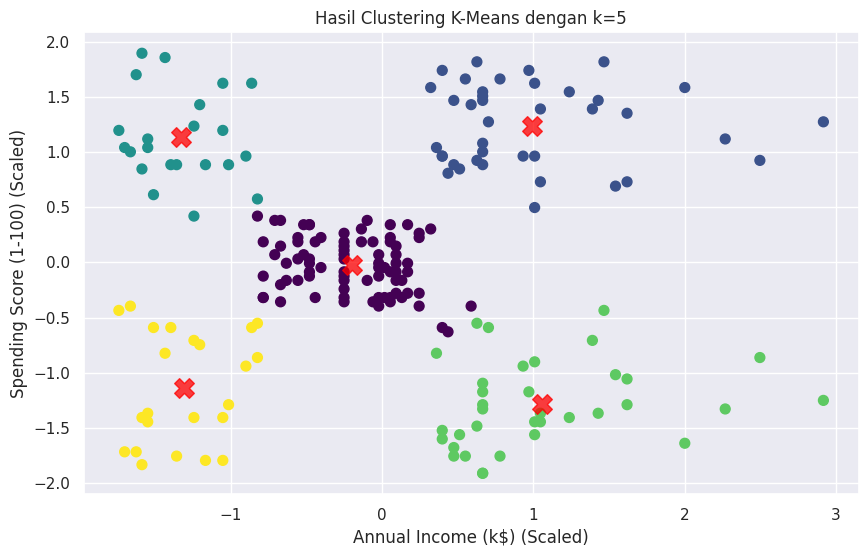


Data dengan Label Cluster (10 baris pertama):
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   
5           6  Female   22                  17                      76   
6           7  Female   35                  18                       6   
7           8  Female   23                  18                      94   
8           9    Male   64                  19                       3   
9          10  Female   30                  19                      72   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  
5        2  
6        4  
7        2  
8        4  
9       

<Figure size 1000x600 with 0 Axes>

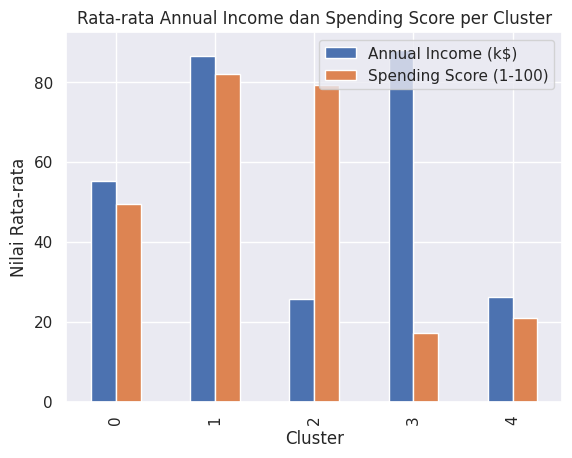

In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv('Mall_Customers.csv')

# Pilih fitur untuk clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menentukan jumlah cluster optimal menggunakan Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

# Pilih jumlah cluster optimal berdasarkan Elbow Method (misalnya k=5)
optimal_k = 5  # Ganti dengan nilai k yang terlihat sebagai "siku" pada grafik
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'Hasil Clustering K-Means dengan k={optimal_k}')
plt.xlabel('Annual Income (k$) (Scaled)')
plt.ylabel('Spending Score (1-100) (Scaled)')
plt.grid(True)
plt.show()

# Tambahkan label cluster ke dataset asli
data['Cluster'] = y_kmeans

# Tampilkan beberapa baris data dengan label cluster
print("\nData dengan Label Cluster (10 baris pertama):")
print(data.head(10))

# Analisis karakteristik setiap cluster
cluster_summary = data.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("\nRata-rata Fitur per Cluster:")
print(cluster_summary)

# (Opsional) Visualisasi rata-rata fitur per cluster menggunakan bar chart
plt.figure(figsize=(10, 6))
cluster_summary.plot(kind='bar')
plt.title('Rata-rata Annual Income dan Spending Score per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Nilai Rata-rata')
plt.grid(True)
plt.show()


**Tugas DBSCAN**

1. Buat dataset make_moons (1000 sampel, noise=0.05), lalu normalisasi.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving make_moons_dataset.csv to make_moons_dataset.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

data = pd.DataFrame({'X0': X[:, 0], 'X1': X[:, 1], 'y': y})
data.to_csv('make_moons_dataset.csv', index=False)
print("Dataset telah disimpan sebagai 'make_moons_dataset.csv'")

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Dataset telah disimpan sebagai 'make_moons_dataset.csv'


In [ ]:
data.head()

,X0,X1,y
0,15,39,0
1,15,81,1
2,16,6,1
3,16,77,0
4,17,40,1


2. Jalankan DBSCAN dengan eps=0.2, min_samples=5, hitung jumlah klaster & noise.

In [ ]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Hitung jumlah cluster dan noise
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("\nHasil DBSCAN (eps=0.2, min_samples=5):")
print(f"Jumlah Cluster: {n_clusters}")
print(f"Jumlah Noise: {n_noise}")


Hasil DBSCAN (eps=0.2, min_samples=5):
Jumlah Cluster: 7
Jumlah Noise: 77


3. Evaluasi dengan metrik: Homogeneity, Completeness, V-measure, ARI, AMI, Silhouette.

In [ ]:
# Evaluasi metrik
if n_clusters > 1:
    homogeneity = homogeneity_score(y, labels)
    completeness = completeness_score(y, labels)
    v_measure = v_measure_score(y, labels)
    ari = adjusted_rand_score(y, labels)
    ami = adjusted_mutual_info_score(y, labels)
    silhouette = silhouette_score(X_scaled, labels)
else:
    homogeneity = completeness = v_measure = ari = ami = silhouette = np.nan

print("\nMetrik Evaluasi (eps=0.2, min_samples=5):")
print(f"Homogeneity: {homogeneity:.4f}")
print(f"Completeness: {completeness:.4f}")
print(f"V-measure: {v_measure:.4f}")
print(f"ARI: {ari:.4f}")
print(f"AMI: {ami:.4f}")
print(f"Silhouette: {silhouette:.4f}")


Metrik Evaluasi (eps=0.2, min_samples=5):
Homogeneity: 0.0094
Completeness: 0.0045
V-measure: 0.0061
ARI: -0.0052
AMI: -0.0120
Silhouette: 0.1406


4. Visualisasikan hasil DBSCAN (core sample = titik besar, non-core = titik kecil, noise = hitam).

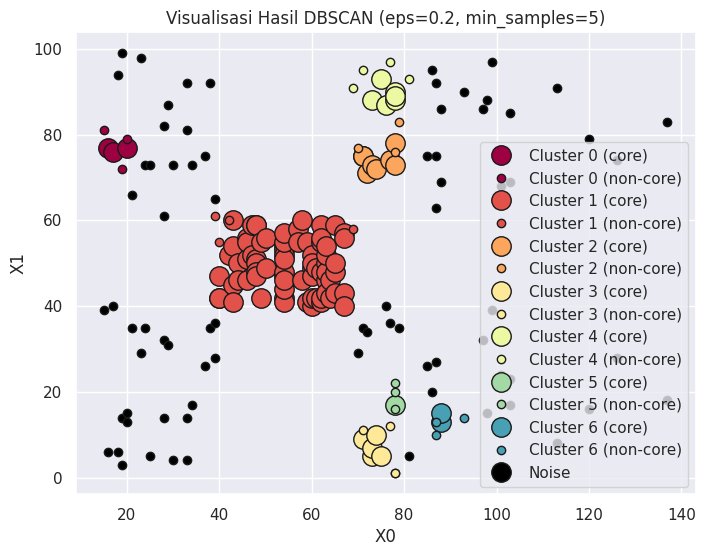

In [ ]:
# Visualisasi hasil DBSCAN
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
unique_labels = set(labels)

plt.figure(figsize=(8, 6))
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Noise berwarna hitam
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]  # Core samples
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14, label=f'Cluster {k} (core)' if k != -1 else 'Noise')
    xy = X[class_member_mask & ~core_samples_mask]  # Non-core samples
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6, label=f'Cluster {k} (non-core)' if k != -1 else None)

plt.title('Visualisasi Hasil DBSCAN (eps=0.2, min_samples=5)')
plt.xlabel('X0')
plt.ylabel('X1')
plt.legend()
plt.grid(True)
plt.show()

5. Lakukan eksperimen:
- eps = 0.05, 0.1, 0.3, 0.5

- min_samples = 3, 10, 20

- Catat perubahan klaster, noise, dan kualitas evaluasi.


Hasil Eksperimen:
 eps  min_samples  n_clusters  n_noise  homogeneity  completeness  v_measure     ari     ami  silhouette
0.05            3           6      179       0.0370        0.0491     0.0422 -0.0007  0.0114     -0.4302
0.05           10           0      200          NaN           NaN        NaN     NaN     NaN         NaN
0.05           20           0      200          NaN           NaN        NaN     NaN     NaN         NaN
0.10            3          14      121       0.0391        0.0166     0.0234 -0.0047 -0.0135     -0.2031
0.10           10           0      200          NaN           NaN        NaN     NaN     NaN         NaN
0.10           20           0      200          NaN           NaN        NaN     NaN     NaN         NaN
0.30            3           9       14       0.0163        0.0063     0.0091 -0.0039 -0.0111      0.4136
0.30           10           4       88       0.0047        0.0027     0.0034 -0.0040 -0.0077      0.1409
0.30           20           1      1

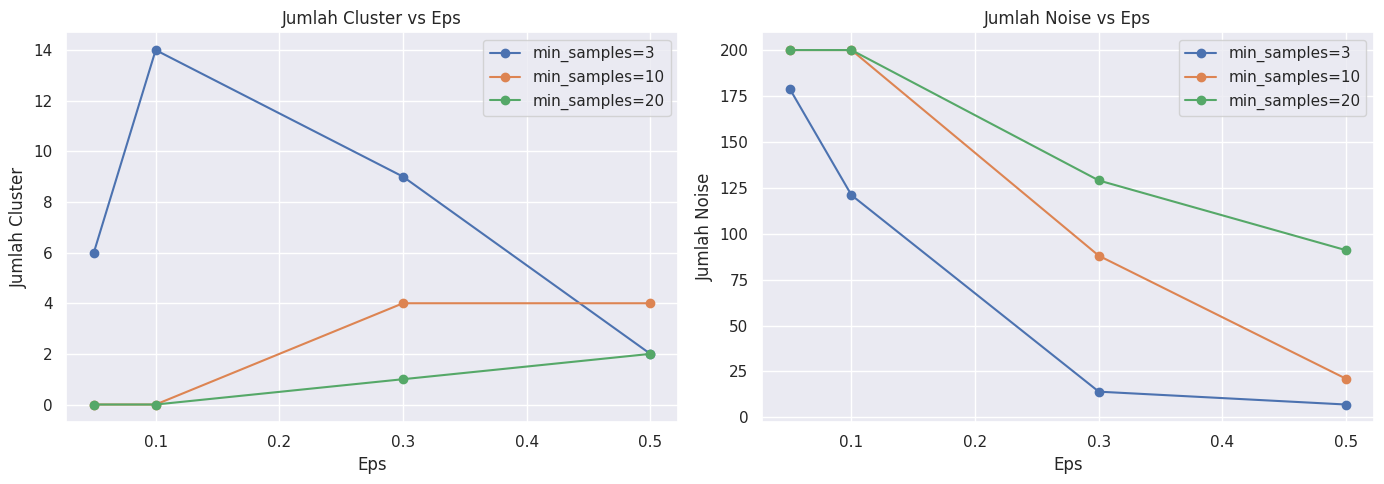

In [ ]:
# Eksperimen dengan variasi eps dan min_samples
eps_values = [0.05, 0.1, 0.3, 0.5]
min_samples_values = [3, 10, 20]
results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        if n_clusters > 1:
            homogeneity = homogeneity_score(y, labels)
            completeness = completeness_score(y, labels)
            v_measure = v_measure_score(y, labels)
            ari = adjusted_rand_score(y, labels)
            ami = adjusted_mutual_info_score(y, labels)
            silhouette = silhouette_score(X_scaled, labels)
        else:
            homogeneity = completeness = v_measure = ari = ami = silhouette = np.nan
        results.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'homogeneity': homogeneity,
            'completeness': completeness,
            'v_measure': v_measure,
            'ari': ari,
            'ami': ami,
            'silhouette': silhouette
        })

# Tampilkan hasil eksperimen dalam tabel
results_df = pd.DataFrame(results)
print("\nHasil Eksperimen:")
print(results_df.round(4).to_string(index=False))

# Visualisasi hasil eksperimen untuk jumlah cluster dan noise
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
for min_samples in min_samples_values:
    subset = results_df[results_df['min_samples'] == min_samples]
    ax1.plot(subset['eps'], subset['n_clusters'], marker='o', label=f'min_samples={min_samples}')
    ax2.plot(subset['eps'], subset['n_noise'], marker='o', label=f'min_samples={min_samples}')

ax1.set_title('Jumlah Cluster vs Eps')
ax1.set_xlabel('Eps')
ax1.set_ylabel('Jumlah Cluster')
ax1.legend()
ax1.grid(True)

ax2.set_title('Jumlah Noise vs Eps')
ax2.set_xlabel('Eps')
ax2.set_ylabel('Jumlah Noise')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()